<a href="https://colab.research.google.com/github/dvisionst/Project_Two/blob/main/Project_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, plot_confusion_matrix
from IPython.core.pylabtools import figsize

In [101]:
df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


1) Source of data is Kaggle and the owner is Aditya Kadiwal

2) Brief description of data:
This data set shows nine different characteristics of water. These characteristics are pH, hardness, solids, chloramines, sulfate, conductivity, 
organic carbon, trihalomethanes, and turbidity. It also has a column that designates if the water is potable or not.

3) What is the target? The 'potability' column is the target

4) Is this a classification or regression problem? This is a classification problem

5) How many features? There are 10 columns.

6) How many rows of data. 3275 rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

This will be a challenge in terms of selecting the proper imputation strategy for missing values. Since I am trying to see if the water is safe to drink or not, I want to be able and determine the best way to handle missing values. 

I chose this data set beacuse I am interested in leveraging the power of machine learning for environmental causes. Sustainability and the environment are two areas in which I would prefer to apply my technical skills in. 

# Part 2

In [103]:
# using describe in order to see if there are any outlier values.
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [104]:
# Creating a copy of the DataFrame in order to apply a potable water filter
dfp = df.copy()
# My potable water filter
potable_fill = dfp['Potability'] == 1
# New DataFrame that only shows data for drinkable/potable water. 
dfp = dfp[potable_fill]
# Displaying various statistcal metrics to gain insights on the dataset
dfp.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [105]:
# Creating another copy of the DataFrame for non-potable water
dfn = df.copy()
# Creating non-potable water filter
non_potable_fill = dfn['Potability'] == 0
# Applying filter and creating only non-potable undrinkable water dataset
dfn = dfn[non_potable_fill]
# Displaying various statistcal metrics to gain insights on the dataset
dfn.describe()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


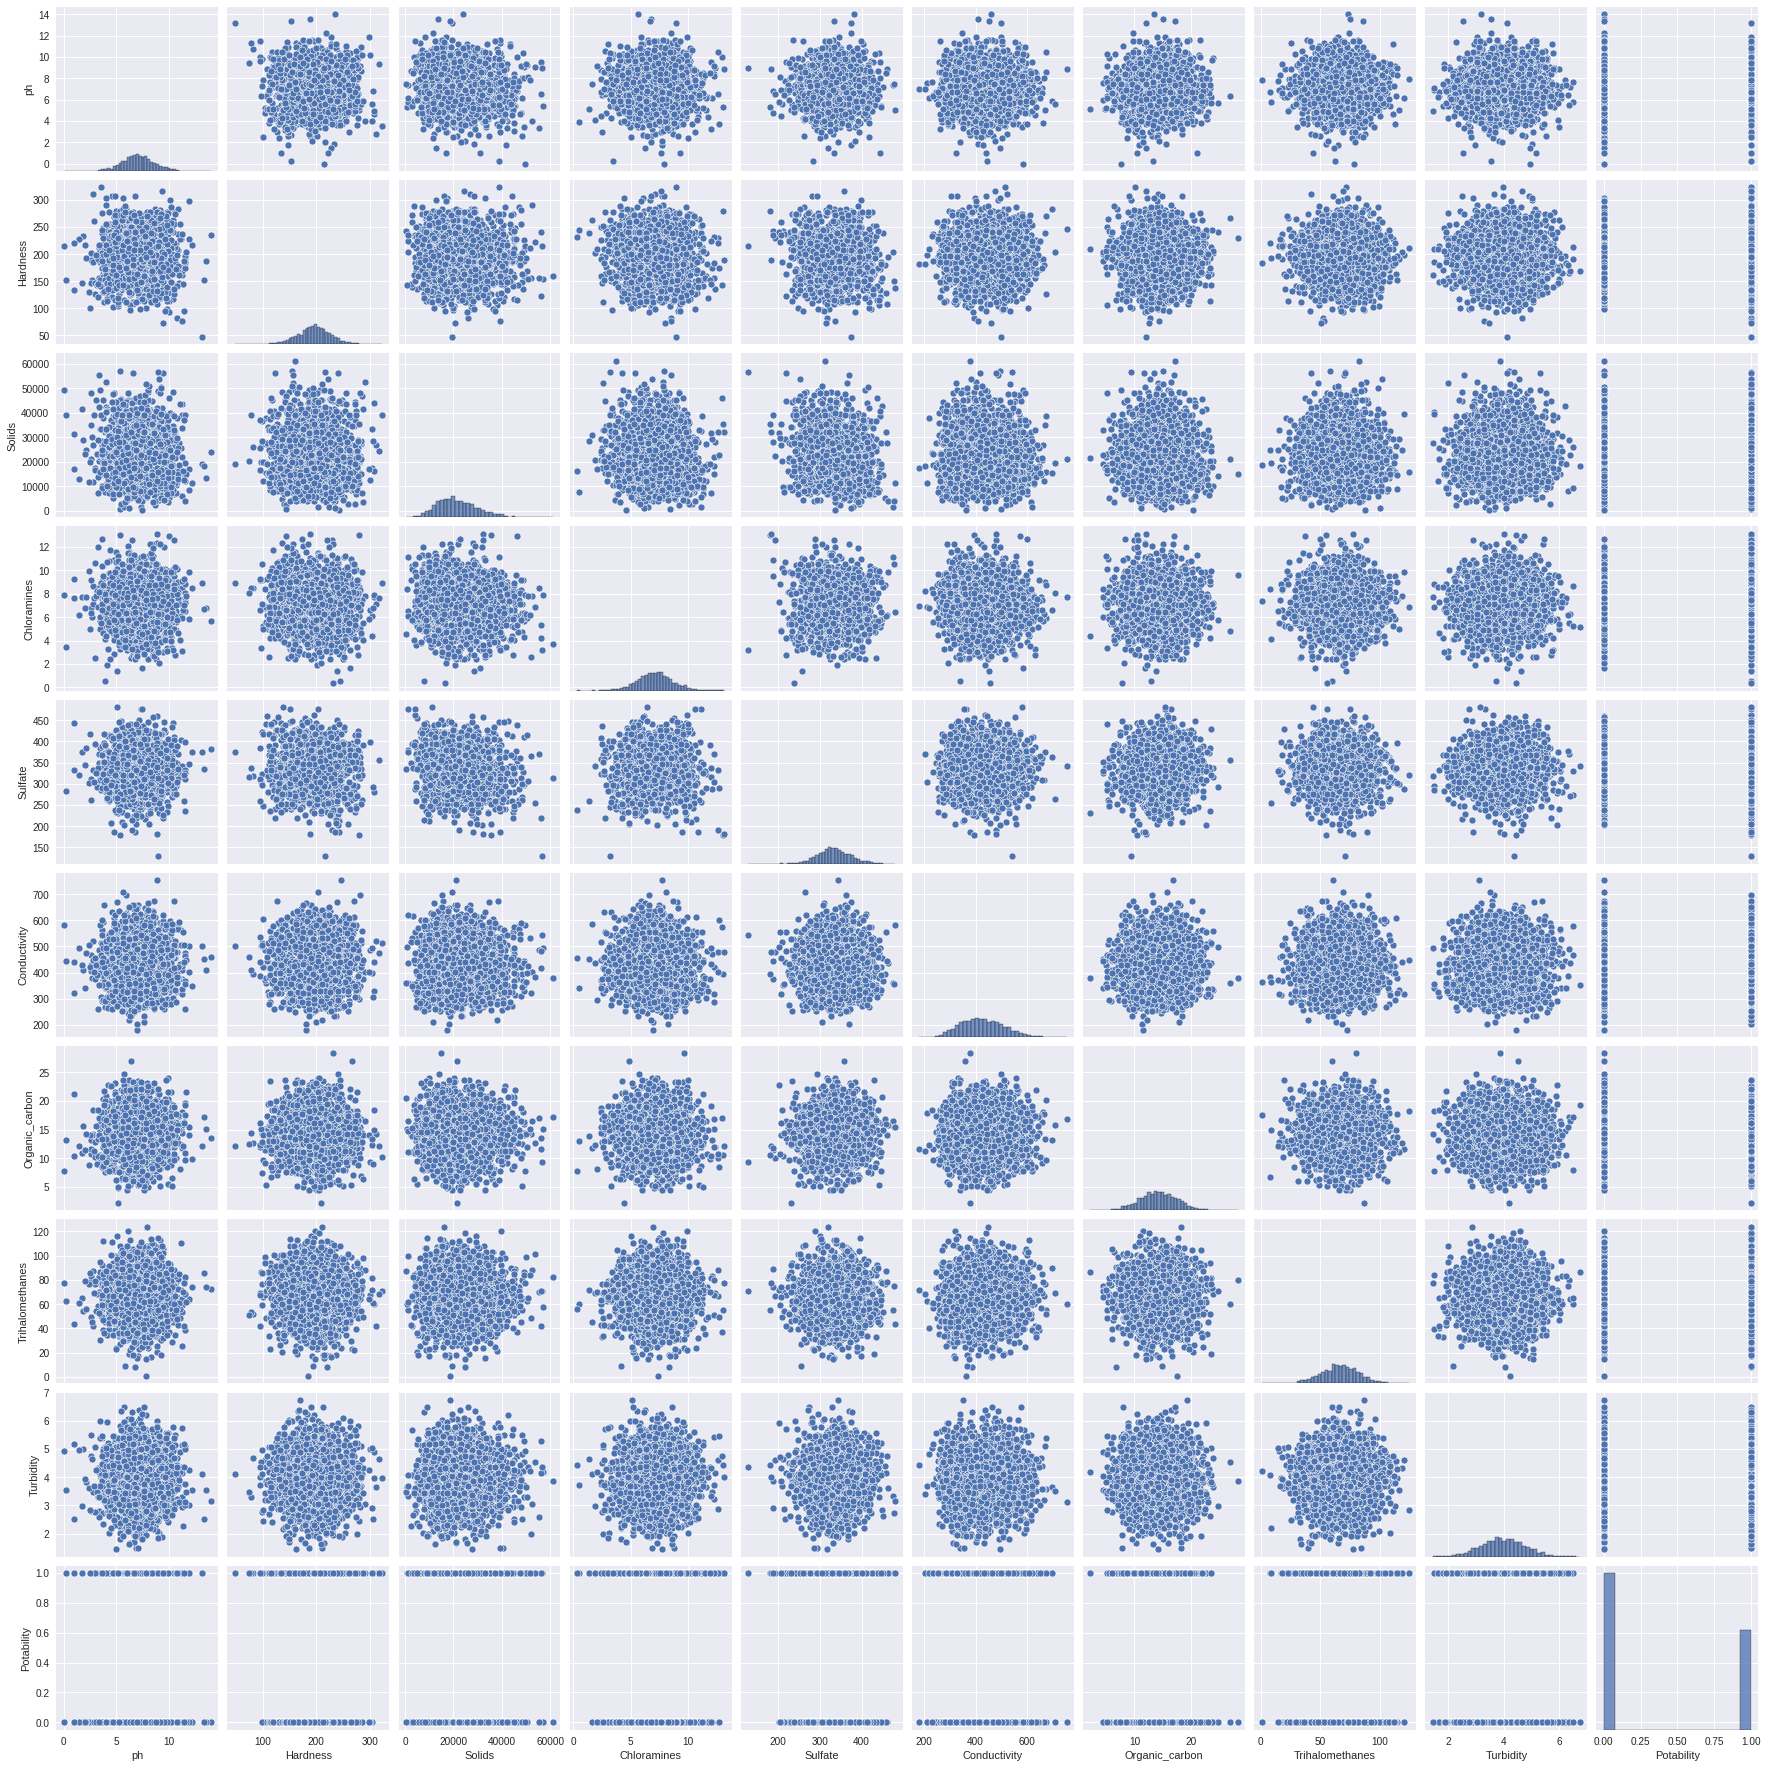

In [106]:
# Using the describe method onthe dataset using different DataFrame didn't yeild
# any relationship or differences in statistical attributes for the features 
# within the dataset. As an alternative will use seaborn pairplot to plot 
# multiple pairwise bivariate distributions in a dataset
sns.pairplot(df);

In [107]:
# looking for duplicated rows, dropping them, and veryfing zero duplicates.
df.duplicated().sum()

0

In [108]:
# Looking for missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

As can be seen in the histogram all of the features in this dataset are normally distibuted. This will allow me to decide which imputation strategy to use. I will use the median strategy on a simple imputer in order address the missing values. I would create a column selector, a mean imputer, and a scaler for this data in a pipeline before fitting it. 

the code would like like something in the block below that's been commented out. 

In [109]:
# This is the code as described in the text block above, commented out
# num_selector = make_column_selector(dtype_include='number')
# mean_imputer = SimpleImputer(strategy='mean')
# scaler = StandardScaler()
# num_pipe = make_pipeline(mean_imputer, scaler)

There are no categorical data types in this data set, so I don't need to deal with inconsistant naming. 

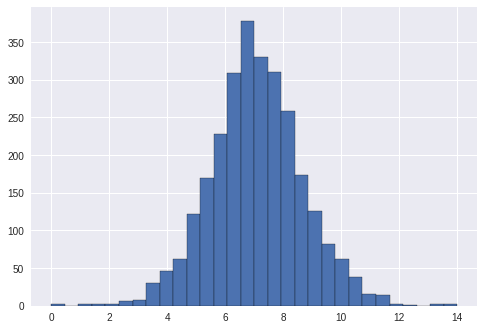

In [110]:
# normal distribution for the histogram plot of the water's ph levels
plt.style.use('seaborn')
df['ph'].hist(bins=30, edgecolor='black');

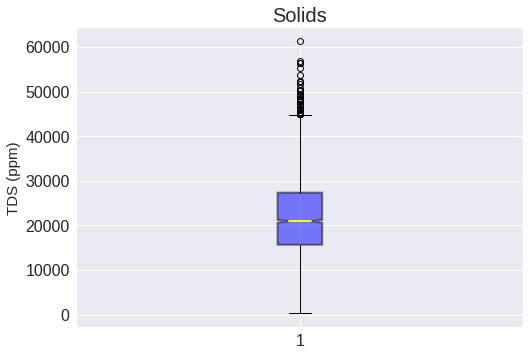

In [111]:
# creating a boxplot for the solids to see how skewed the data truly is
tds = df['Solids']
plt.boxplot([tds],
                        notch=True,
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('TDS (ppm)', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Solids', fontdict={'fontsize': 20});

This boxplot of the Solids is showing a skewed distribution. The max value could be seen as an outlier. However, it seems to be in the area of other skewed values, thus I'll leave it alone. I will wait to see how it is scaled once I get to that part.  

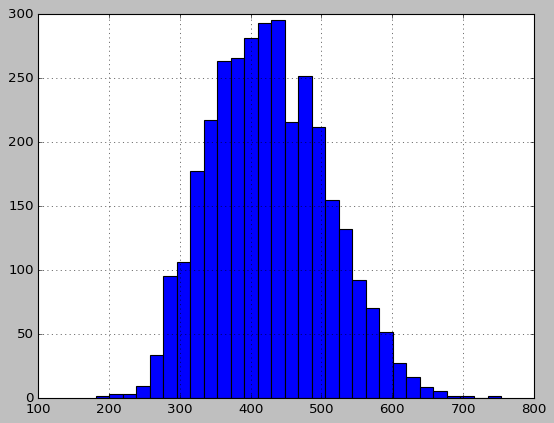

In [112]:
# classic histogram plot for the conductivity of the water
plt.style.use('classic')
df['Conductivity'].hist(bins=30, edgecolor='black');

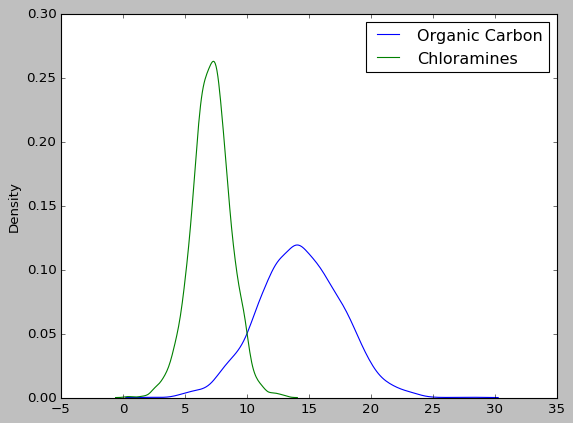

In [113]:
# Doing two distribution curves on same plot since Organic Carbon and 
# Cholormines are in the same units ppm (parts per million)
sns.kdeplot(df['Organic_carbon']);
sns.kdeplot(df['Chloramines']);
plt.xlabel('')
plt.legend(labels=['Organic Carbon', 'Chloramines']);

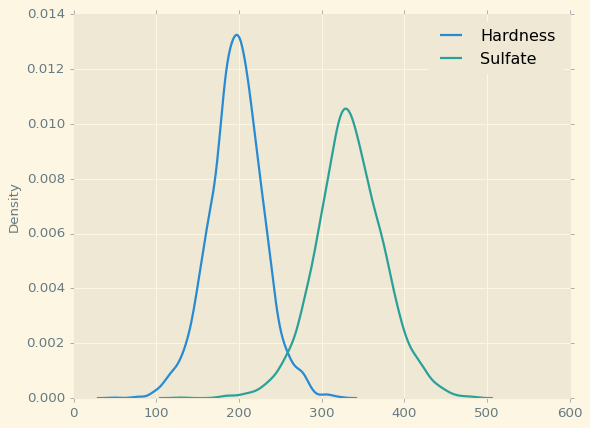

In [114]:
# Doing two distribution curves on same plot since Hardness and 
# Sulfates are in the same units mg/L
plt.style.use('Solarize_Light2')
sns.kdeplot(df['Hardness']);
sns.kdeplot(df['Sulfate']);
plt.xlabel('')
plt.legend(labels=['Hardness','Sulfate']);

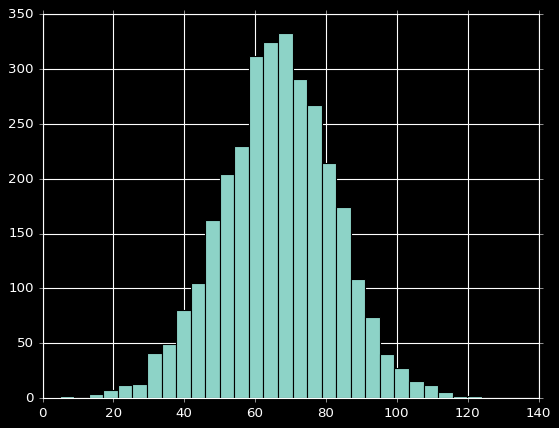

In [ ]:
# histogram for the Trihalomethanes which shows a normal distribution
plt.style.use('dark_background')
df['Trihalomethanes'].hist(bins=30, edgecolor='black');

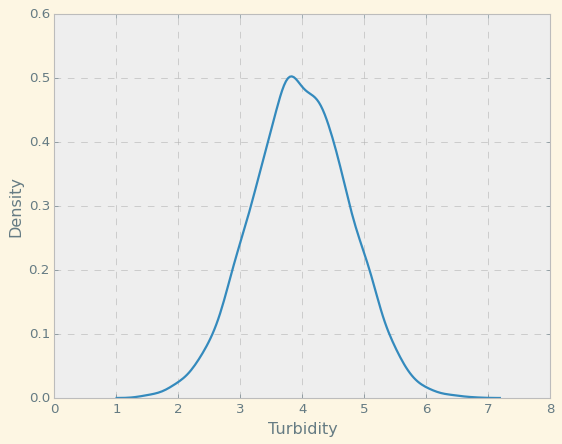

In [115]:
# distribution plot for turbidity which is a measure of light emitting 
# properties of the water
plt.style.use('bmh')
sns.kdeplot(df['Turbidity']);

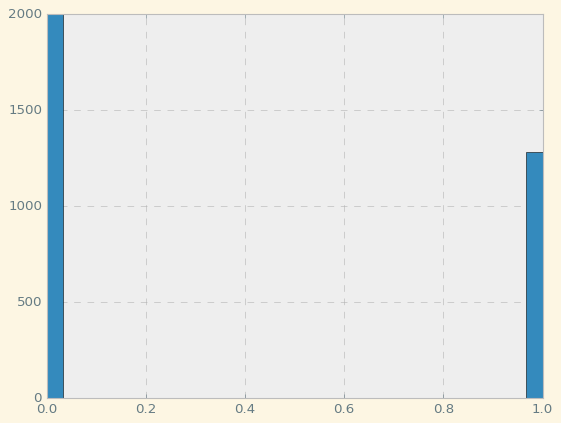

In [116]:
# potability histogram showing that the dataset has more non-potable rows
plt.style.use('bmh')
df['Potability'].hist(bins=30, edgecolor='black');

# Part 3

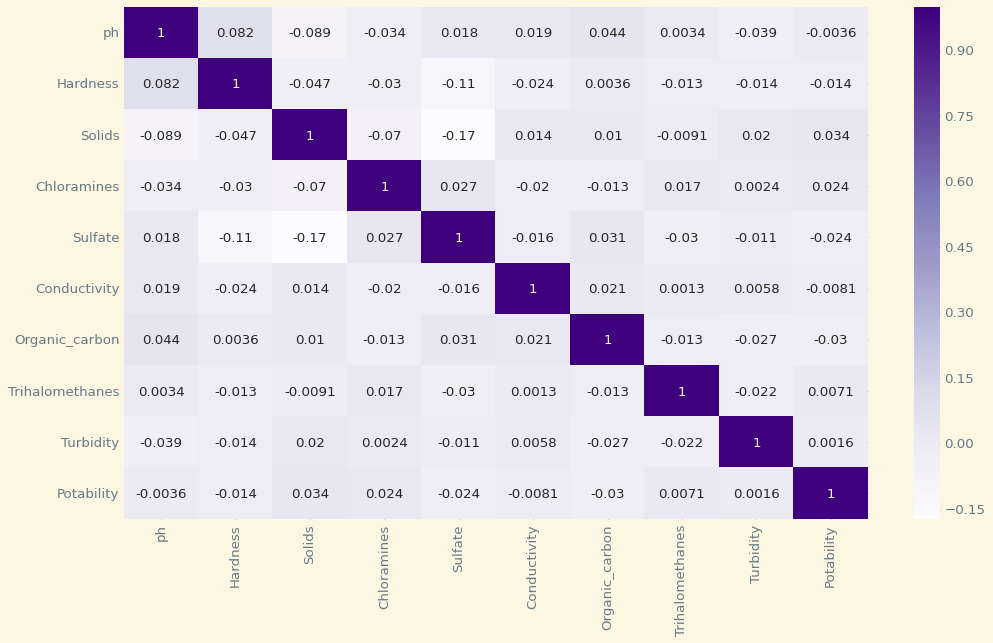

In [117]:
# creating heatmap to see any possible correlations
plt.figure(figsize = (15,8))
correlations = df.corr();
sns.heatmap(correlations, cmap='Purples' , annot=True);

As the Heatmap shows, there does not appear to be any values that would showcase a correlation between any two features. Every Value is closer to zero than anything that it appears no features are correlated. Beacause of this plotting two features vs each other won't make the most of sense. 

In [118]:
# creating a function in order to display median value above the bar
def mean_label(x_pos, y_val, adj):
  plt.text(x_pos, (y_val + adj), s=y_val, ha="center")

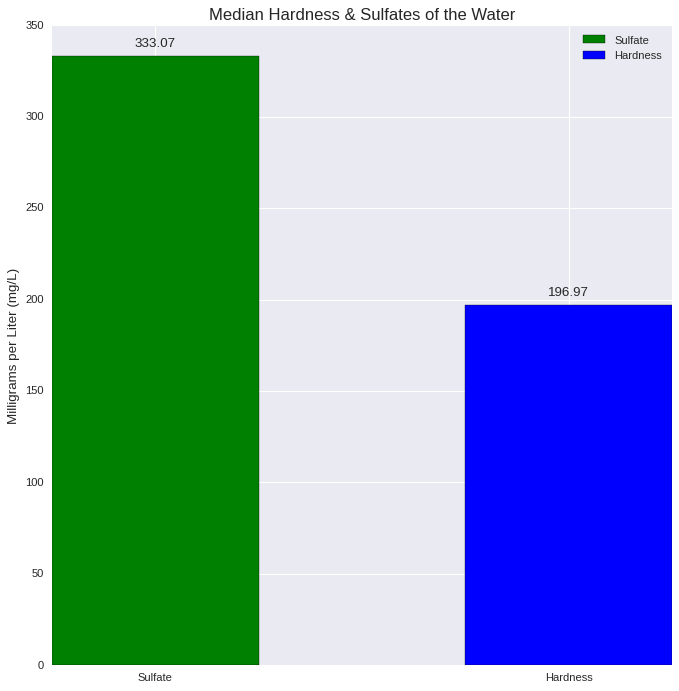

In [119]:
# Creating a multivariate bar chart for the features that are in the same units 
# and comparing their medians. 

# start by making a copy of the df since I'll be calculating medians for 
# Hardness and Sulfate  
df2 = df.copy()

# Creating varibales to store median values 

sulfate = round(df2['Sulfate'].median(), 2)
hardness = round(df2['Hardness'].median(), 2)
x_s = 'Sulfate'
x_h = 'Hardness'
# setting width of bar and plot size and styling
plt.style.use('seaborn')
bar_width = 0.5
fig = plt.subplots(figsize=(10,10))

# creating the barplots and adding legends, axis labels, title, and bar values
plt.bar(x_s, sulfate, color='g', width=bar_width, 
        edgecolor='black', label='Sulfate');
plt.bar(x_h, hardness, color='b', width=bar_width, 
        edgecolor='black', label='Hardness');

plt.legend();
mean_label(x_s, sulfate, 5);
mean_label(x_h, hardness, 5);
plt.ylabel('Milligrams per Liter (mg/L)', fontdict={'fontsize':12})
plt.title('Median Hardness & Sulfates of the Water', fontdict={'fontsize':15});

7.13


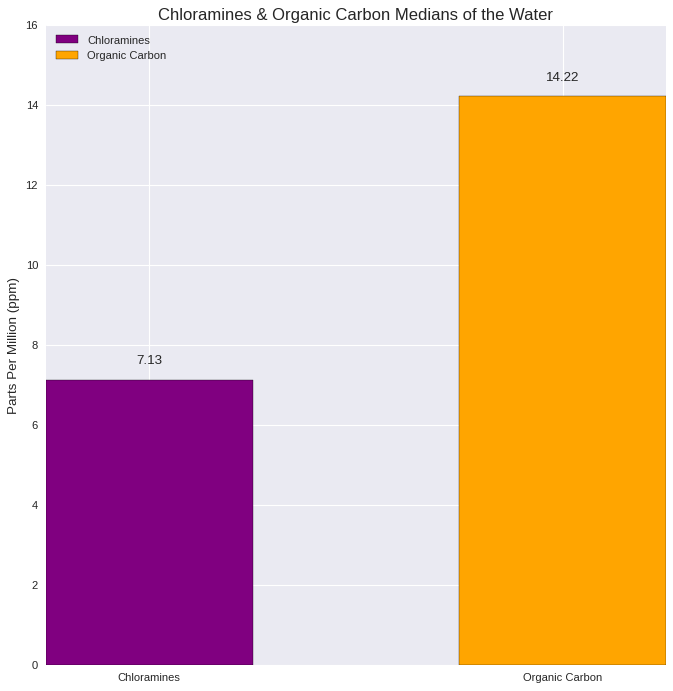

In [120]:
# Creating a multivariate bar chart for the features that are in the same units 
# and comparing their medians. 

# Creating varibales to store median values 
x_c = 'Chloramines'
x_oc = 'Organic Carbon'
chloramines = round(df2[x_c].median(), 2)
org_carbon = round(df2['Organic_carbon'].median(), 2)
print(chloramines)
# setting width of bar and plot size and styling
plt.style.use('seaborn')
bar_width = 0.5
fig = plt.subplots(figsize=(10,10))

# creating the barplots and adding legends, axis labels, title, and bar values
plt.bar(x_c, chloramines, color='purple', width=bar_width, 
        edgecolor='black', label=x_c);
plt.bar(x_oc, org_carbon, color='orange', width=bar_width, 
        edgecolor='black', label=x_oc);
plt.legend(loc='upper left');
mean_label(x_c, chloramines, 0.4);
mean_label(x_oc, org_carbon, 0.4);
plt.ylabel('Parts Per Million (ppm)', fontdict={'fontsize':12})
plt.title('Chloramines & Organic Carbon Medians of the Water', 
          fontdict={'fontsize':15});

In [121]:
# creating features matrix and target vector 
y = df['Potability']
X = df.drop(columns='Potability')

#Creating the split for training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [122]:
# Instantiating scaler and imputer

mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Creating my numeric pipeline for the imputer and scaler
num_pipe = make_pipeline(mean_imputer, scaler)


In [123]:
# Creating Logistic Regression model
log = LogisticRegression()
logreg = make_pipeline(num_pipe, log)

In [124]:
# Fitting to the training data. 
logreg.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [125]:
# Looking at the score of the Log Reg model to evaluate performance
scores = logreg.score(X_test, y_test)
scores

0.6227106227106227

In [126]:
# Hypertuning the L1 parameter, starting by creating list of c values and empty 
# lists for us in a loop

c_list = [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# for loop in order to iterate and find performin c value

for c in c_list:
  # Instatiating the LogReg model with varying values of c
  log_r = LogisticRegression(C=c, max_iter=1000, 
                             solver='liblinear', penalty='l1')
  # pipeline with model and num scaler/imputer, then fitting onto training data
  log_r_pipe = make_pipeline(num_pipe, log_r)
  log_r_pipe.fit(X_train, y_train)
  # appending empty scores lists 
  train_scores.append(log_r_pipe.score(X_train, y_train))
  test_scores.append(log_r_pipe.score(X_test, y_test))



{0.001: 0.623,
 0.01: 0.623,
 0.1: 0.623,
 1: 0.623,
 10: 0.623,
 100: 0.623,
 1000: 0.623}

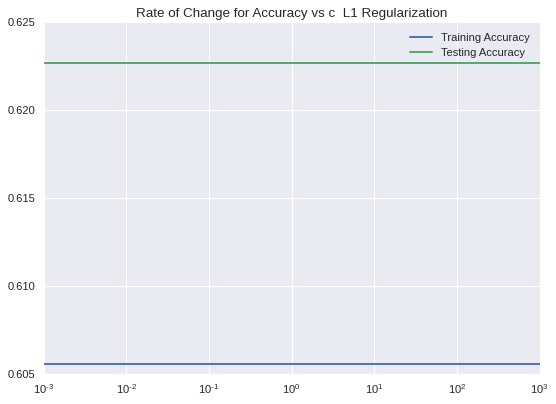

In [127]:
#plot the change in accuracy vs value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_list, train_scores, label='Training Accuracy')
ax.plot(c_list, test_scores, label='Testing Accuracy')
ax.set_xticks(c_list)
ax.set_title('Rate of Change for Accuracy vs c  L1 Regularization')
ax.legend()
 
#setting x axis to log scale 
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:round(score,3) for c, score in zip(c_list, test_scores)}

In [128]:
# Hypertuning the L2 parameter for optimization
# creating lists to be used in a loop to find optimization. 

c_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# for loop to find optimal c value

for c in c_list:

  # creating the model, pipeline and fitting it with different c values
  log_reg = LogisticRegression(C=c, max_iter=1000, 
                               solver="liblinear", penalty="l2")
  log_reg_pipe = make_pipeline(num_pipe, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # appending scores to the empty training and testing lists

  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

{1e-05: 0.623,
 0.0001: 0.623,
 0.001: 0.623,
 0.01: 0.623,
 0.1: 0.623,
 1: 0.623,
 10: 0.623,
 100: 0.623,
 1000: 0.623}

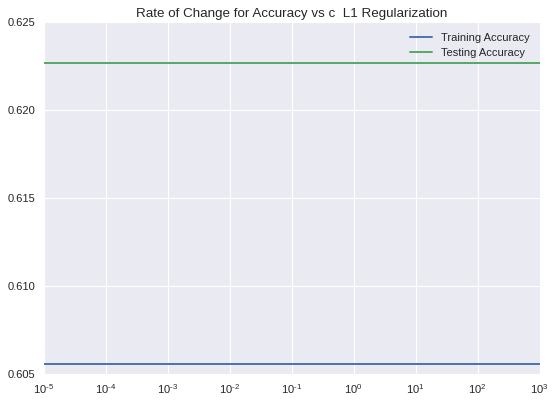

In [129]:
#plot the change in accuracy vs value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_list, train_scores, label='Training Accuracy')
ax.plot(c_list, test_scores, label='Testing Accuracy')
ax.set_xticks(c_list)
ax.set_title('Rate of Change for Accuracy vs c  L1 Regularization')
ax.legend()
 
#setting x axis to log scale 
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:round(score, 3) for c, score in zip(c_list, test_scores)}

In [130]:
# using metrics function in order to see how the Logistic Regression Model fares
# in other evaluation metrics
train_pred = logreg.predict(X_train);
test_pred = logreg.predict(X_test);
train_r = classification_report(y_train, train_pred, zero_division=0);
test_r = classification_report(y_test, test_pred, zero_division=0);
print(train_r, "\n\n\n")
print(test_r)

              precision    recall  f1-score   support

           0       0.61      1.00      0.75      1488
           1       0.00      0.00      0.00       969

    accuracy                           0.61      2457
   macro avg       0.30      0.50      0.38      2457
weighted avg       0.37      0.61      0.46      2457
 



              precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819



In [131]:
# Creating a KNN model with the scaler and imputer

knn = KNeighborsClassifier()
knn_pipe = make_pipeline(num_pipe, knn)

# Fitting onto the training data
knn_pipe.fit(X_train, y_train)

# Obtaining KNN model score
k_score = knn_pipe.score(X_test, y_test)
k_score

0.6263736263736264

In [132]:
# Initializing pipeline with scaler and the model
pipe_knn = make_pipeline(num_pipe, KNeighborsClassifier())

In [133]:
# creating parameter dictionary to use in GridSearchCV object
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1,10),
    "kneighborsclassifier__p": range(1,5),
    "kneighborsclassifier__weights": ['distance', 'uniform']

}

In [134]:
%%time
# putting the knn pipeline and parameter grid inside the GridSearch
knn_pipe_gs = GridSearchCV(pipe_knn, param_grid)
# fitting on the training data
knn_pipe_gs.fit(X_train, y_train)

# printing the results for the best parameters. 
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.6568986568986569
CPU times: user 1min 10s, sys: 135 ms, total: 1min 10s
Wall time: 1min 10s


In [135]:
# creating classification report for the best knn model
train_knn_pred = best_pipe.predict(X_train)
test_knn_pred = best_pipe.predict(X_test)
# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_knn_pred)
test_report = classification_report(y_test, test_knn_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.69      0.93      0.79      1488
           1       0.78      0.37      0.50       969

    accuracy                           0.71      2457
   macro avg       0.74      0.65      0.65      2457
weighted avg       0.73      0.71      0.68      2457
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       510
           1       0.60      0.28      0.38       309

    accuracy                           0.66       819
   macro avg       0.63      0.58      0.57       819
weighted avg       0.64      0.66      0.62       819



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


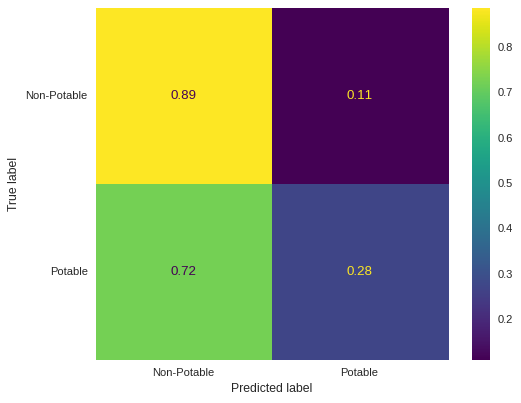

In [136]:
# Creatin labels for use on a confusion matrix 
labels = ['Non-Potable', 'Potable']

# Creating confusion matrix for best KNN model
plot_confusion_matrix(estimator=best_pipe, display_labels=labels, X=X_test, 
                      y_true=y_test, normalize='true');
plt.grid(False);


In [137]:
# Instantiating PCA with 95% variance capture
pca =PCA(n_components=.95)
# Using the best KNN model that has already been hypertuned along with PCA
knn_pca_pipe = make_pipeline(num_pipe, pca, best_pipe)
# Fitting the model on the training dataset
knn_pca_pipe.fit(X_train, y_train)



Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('pca', PCA(n_components=0.95)),
                ('pipeline-2',
                 Pipeline(steps=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())])),
                                 ('kneighborsclassifier',
                                  KNeighborsClassifier(n_neighbors=8, p=1))]))])

In [138]:
# Looking at KNN with PCA score
knn_pca_score =knn_pca_pipe.score(X_test, y_test)
knn_pca_score

0.6422466422466423

In [139]:
# creating classification report for KNN with PCA
train_knn_pca_pred = knn_pca_pipe.predict(X_train)
test_knn_pca_pred = knn_pca_pipe.predict(X_test)
# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_knn_pca_pred)
test_report = classification_report(y_test, test_knn_pca_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.69      0.93      0.79      1488
           1       0.78      0.36      0.49       969

    accuracy                           0.71      2457
   macro avg       0.74      0.65      0.64      2457
weighted avg       0.73      0.71      0.68      2457
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       510
           1       0.55      0.27      0.36       309

    accuracy                           0.64       819
   macro avg       0.61      0.57      0.56       819
weighted avg       0.62      0.64      0.60       819



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


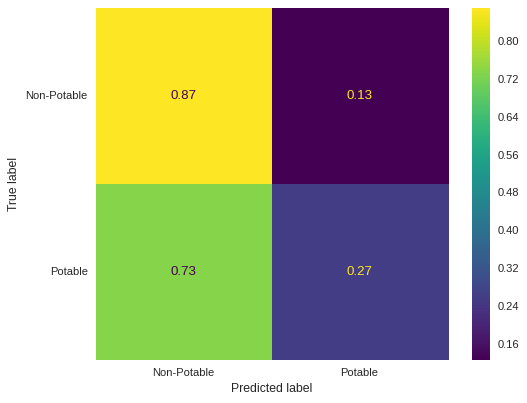

In [140]:
# Creatin labels for use on a confusion matrix 
labels = ['Non-Potable', 'Potable']

# Creating confusion matrix for  KNN with PCA model
plot_confusion_matrix(estimator=knn_pca_pipe, display_labels=labels, X=X_test, 
                      y_true=y_test, normalize='true');
plt.grid(False);


In [81]:
# Creating a copy of the df in order to conduct more Feature Engineering
df2 = df.copy()
y2 = df2['Potability']
X2 = df2.drop(columns='Potability')
# splitting df copy into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

As can be seen in the plot above the highest silhouette score is when there are two clusters. I'll be using that to create a KMeans model

In [38]:
# Creating decision tree model with initial conditions of 2 max depth for nodes
dec_tree = DecisionTreeClassifier(max_depth=2)
# Making a pipeline for the model and including the scaler and imputer
dt_pipe = make_pipeline(num_pipe, dec_tree)
# Fitting onto the training set
dt_pipe.fit(X_train, y_train)
# Obtaining sccore for the decision tree model
dt_score = dt_pipe.score(X_test, y_test)
dt_score


0.6324786324786325

In [39]:
# Getting parameters in order to hypertune the decision tree model
dt_pipe.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('simpleimputer', SimpleImputer()),
                   ('standardscaler', StandardScaler())])),
  ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=2))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=2),
 'pipeline__memory': None,
 'pipeline__steps': [('simpleimputer', SimpleImputer()),
  ('standardscaler', StandardScaler())],
 'pipeline__verbose': False,
 'pipeline__simpleimputer': SimpleImputer(),
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__simpleimputer__add_indicator': False,
 'pipeline__simpleimputer__copy': True,
 'pipeline__simpleimputer__fill_value': None,
 'pipeline__simpleimputer__missing_values': nan,
 'pipeline__simpleimputer__strategy': 'mean',
 'pipeline__simpleimputer__verbose': 0,
 'pipeline__standardscaler__copy': True,
 'pipeline__stan

In [40]:
# creating parameter dictionary to be used with Grid Search
param_grid = {'decisiontreeclassifier__max_depth':[3,5, 10],
              'decisiontreeclassifier__min_samples_leaf':[1, 2, 3],
              'decisiontreeclassifier__min_samples_split':[50, 125, 250]}

In [41]:
%%time
# Hypertuning using Grid Search
dt_grid_search = GridSearchCV(dt_pipe, param_grid)
# Fitting on training data
dt_grid_search.fit(X_train, y_train)
# displaying best parameters in order to recreate best model
dt_grid_search.best_params_

CPU times: user 2.91 s, sys: 8.56 ms, total: 2.92 s
Wall time: 2.93 s


{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 50}

In [43]:
# Creating a decision tree model with the best parameters
best_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=50)
# Creating pipeline with best model along with scaler and imputer pipeline.
dt_best_pipe = make_pipeline(num_pipe, best_tree)
# Fitting onto the training set
dt_best_pipe.fit(X_train, y_train)
# Obtaining sccore for the decision tree model
dt_best_score = dt_pipe.score(X_test, y_test)
dt_best_score

0.6324786324786325

In [44]:
# creating classification report for the best decision tree model
train_tree_pred = dt_best_pipe.predict(X_train)
test_tree_pred = dt_best_pipe.predict(X_test)
# printing out the classification report in order to see 
# precision, recall and f1-score for test and train sets
train_report = classification_report(y_train, train_tree_pred)
test_report = classification_report(y_test, test_tree_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.66      0.94      0.78      1488
           1       0.74      0.24      0.37       969

    accuracy                           0.67      2457
   macro avg       0.70      0.59      0.57      2457
weighted avg       0.69      0.67      0.61      2457
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       510
           1       0.59      0.21      0.31       309

    accuracy                           0.65       819
   macro avg       0.62      0.56      0.53       819
weighted avg       0.63      0.65      0.59       819

